Importing libraries

In [1]:
import numpy as np
import pathlib
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
from PIL import Image
import tensorflow
from tensorflow import keras
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Dataset

In [3]:
train_dir = '/content/drive/MyDrive/AI/Vegetables/train'
train_dir = pathlib.Path(train_dir)

validation_dir = '/content/drive/MyDrive/AI/Vegetables/validation'
validation_dir = pathlib.Path(validation_dir)

test_dir = '/content/drive/MyDrive/AI/Vegetables/test'
test_dir = pathlib.Path(test_dir)

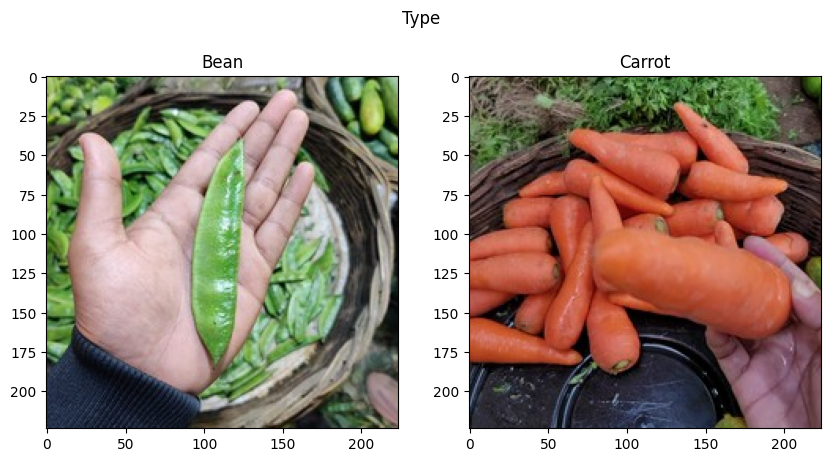

In [4]:
Bean = list(train_dir.glob('Bean/*'))
Carrot = list(train_dir.glob('Carrot/*'))


fig, ax = plt.subplots(ncols= 2, nrows = 1, figsize=(10,5))
fig.suptitle('Type')

Bean_img = img.imread(Bean[0])
Carrot_img = img.imread(Carrot[0])

ax[0].set_title('Bean')
ax[1].set_title('Carrot')

ax[0].imshow(Bean_img)
ax[1].imshow(Carrot_img)

In [5]:
df_img = {
    'Bean':Bean,
    'Carrot':Carrot
}

df_labels = {
    'Bean':0,
    'Carrot':1
}

In [6]:
img = Image.open(str(df_img['Bean'][0]))
img_array = np.array(img) # Convert the image to numerical array
img_shape = img_array.shape # Check the shape of the array
print(img_shape)

(224, 224, 3)


In [7]:
X, y = [], []  # X = images, y = labels
for label, images in df_img.items():
    for image in images:
        img = Image.open(image)
        X.append(np.array(img))
        y.append(df_labels[label])

In [8]:
print('len(X) : ',len(X))
print('len(y) : ',len(y))

len(X) :  2000
len(y) :  2000


In [9]:
# Standardize
X = np.array(X, dtype='float32') / 255.0  # Convert to float and normalize
y = np.array(y)

In [10]:
# Converting labels in y to categorical format

y_cat = to_categorical(y)

validation data

In [11]:
Bean = list(validation_dir.glob('Bean/*'))
Carrot = list(validation_dir.glob('Carrot/*'))

val_images = {
    'Bean':Bean,
    'Carrot':Carrot
}

val_labels = {
    'Bean':0,
    'Carrot':1
}

X_val, y_val = [], []  # X = images, y = labels
for label, images in val_images.items():
    for image in images:
        img = Image.open(image)
        X_val.append(np.array(img))
        y_val.append(val_labels[label])

img = Image.open(str(val_images['Bean'][0]))
img_array = np.array(img) # Convert the image to numerical array
img_shape = img_array.shape # Check the shape of the array
print(img_shape)


X_val = np.array(X_val, dtype='float32') / 255.0
y_val = np.array(y_val)

print(X_val.shape)
print(y_val.shape)

y_val = to_categorical(y_val)

print(X_val.shape)
print(y_val.shape)

(224, 224, 3)
(400, 224, 224, 3)
(400,)
(400, 224, 224, 3)
(400, 2)


Building the Model

In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(5,5),input_shape=(224,224,3),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(256,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

Training

In [14]:
hist = model.fit(X,y_cat,epochs=25,validation_data=(X_val,y_val))

In [15]:
model.evaluate(X_val,y_val)

13/13 [==============================] - 45s 4s/step - loss: 0.0796 - accuracy: 0.9850


[0.07961804419755936, 0.9850000143051147]

Preprocessing Test data

In [16]:
Bean = list(test_dir.glob('Bean/*'))
Carrot = list(test_dir.glob('Carrot/*'))

test_images = {
    'Bean':Bean,
    'Carrot':Carrot
}

test_labels = {
    'Bean':0,
    'Carrot':1
}

X_test, y_test = [], []  # X = images, y = labels
for label, images in test_images.items():
    for image in images:
        img = Image.open(image)
        X_test.append(np.array(img))
        y_test.append(test_labels[label])

img = Image.open(str(test_images['Bean'][0]))
img_array = np.array(img) # Convert the image to numerical array
img_shape = img_array.shape # Check the shape of the array
print(img_shape)


X_test = np.array(X_test, dtype='float32') / 255.0  # Convert to float and normalize
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

y_test = to_categorical(y_test)

print(X_test.shape)
print(y_test.shape)

(224, 224, 3)
(400, 224, 224, 3)
(400,)
(400, 224, 224, 3)
(400, 2)


In [17]:
#Evaluate

model.evaluate(X_test,y_test)

13/13 [==============================] - 38s 3s/step - loss: 0.0677 - accuracy: 0.9925


[0.06774993240833282, 0.9925000071525574]

Testing the model with Samples

Sample 1

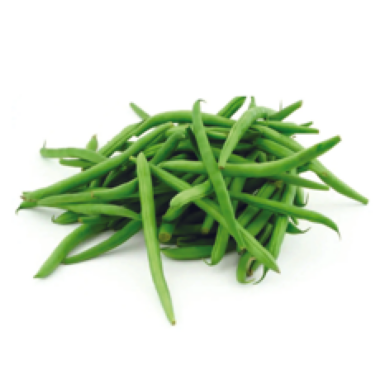

In [18]:
img_path = '/content/Bean.jpg'
img = Image.open(img_path)

img = img.resize((224, 224))  # Resize the image to (224, 224)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

In [19]:
# Convert the image to a numpy array
img_array = np.array(img)

# Display the shape of the image array
print("Image Shape:", img_array.shape)

# Convert the image to a numpy array and normalize it
img_array = np.array(img) / 255.0

# Display the shape of the normalized image array
print("Image Shape (normalized):", img_array.shape)

predictions = model.predict(np.expand_dims(img_array, axis=0))
print(predictions)

# Get the index of the maximum value
predicted_index = np.argmax(predictions)

# Map the index to the corresponding class
if predicted_index == 0:
    predicted_class = 'Bean'
elif predicted_index == 1:
    predicted_class = 'Carrot'
else:
    predicted_class = 'Unknown'

print("Predicted Class:", predicted_class)

Image Shape: (224, 224, 3)
Image Shape (normalized): (224, 224, 3)
1/1 [==============================] - 0s 402ms/step
[[3.6008802e-01 3.7876791e-10]]
Predicted Class: Bean


Sample 2

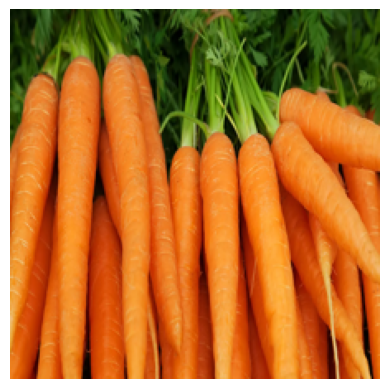

In [21]:
# Load the image
img_path = '/content/Carrot.jpg'
img = Image.open(img_path)
img = img.resize((224, 224))  # Resize
plt.imshow(img) # Display
plt.axis('off')
plt.show()

In [22]:
img_array = np.array(img)
print("Image Shape:", img_array.shape)

Image Shape: (224, 224, 3)


In [23]:
img_array = np.array(img) / 255.0
print("Image Shape (normalized):", img_array.shape)

Image Shape (normalized): (224, 224, 3)


In [24]:
predictions = model.predict(np.expand_dims(img_array, axis=0))
print(predictions)

1/1 [==============================] - 0s 125ms/step
[[0.03551954 0.82278156]]


In [25]:
predicted_index = np.argmax(predictions)

if predicted_index == 0:
    predicted_class = 'Bean'
elif predicted_index == 1:
    predicted_class = 'Carrot'
else:
    predicted_class = 'Unknown'

print("Predicted Class:", predicted_class)

Predicted Class: Carrot
